In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install textblob
! pip install wordcloud
! pip install pyabsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy.cli

spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
#IMPORTING REQUIRED LIBRARIES
import warnings 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import re
import json 
import nltk
#nltk.download('all')
import spacy
import string
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob 
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS


nlp= spacy.load('en_core_web_sm')
nlp= spacy.load('en_core_web_lg')

from IPython import display 
display.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')

from statistics import mode
from collections import Counter 

In [ ]:
## IMPORT DATA IN PANDAS

vgames_review_df = pd.read_json("/content/drive/MyDrive/ML/Data/Major Project/Video_Games_5.json", orient='records', lines=True)
toys_review_df = pd.read_json('/content/drive/MyDrive/ML/Data/Major Project/Toys_and_Games_5.json', orient='records', lines=True)
vgames= vgames_review_df.copy()
toys = toys_review_df.copy()


II. Preliminary Analysis

In [ ]:
## CHECK DATA IN PANDAS
# DEFINING FUNCTION FOR DATA CHECK

def datacheck(text):
    print ("================================================")
    # change column name 
    text = text.rename(columns={'overall': 'Rating'})

    print ("Total dataset:", str(text.shape))
    print()
    
    ### Total reviews
    total = len(text)
    print ("Number of reviews: ",total)
    print ()

    ### How many unique reviewers?
    print ("Number of unique reviewers: ",len(text.reviewerID.unique()))
    reviewer_prop = float(len(text.reviewerID.unique())/total)
    print ("Prop of unique reviewers: ",round(reviewer_prop,3))
    print ()

    ### How many unique products?
    print ("Number of unique products: ", len(text.asin.unique()))
    product_prop = float(len(text.asin.unique())/total)
    print ("Prop of unique products: ",round(product_prop,3))
    print ()

    ### Average star score
    print ("Average rating score: ",round(text.Rating.mean(),3))

    print ("================================================")
    print()
    return text.head()

In [ ]:
# check whehter it's having null values or not
## dropping a unwanted columns

def null(text):
    print(text.isnull().sum())
    text.drop(text.columns[[ 2,3, 7]], axis = 1, inplace = True)  #removing unwanted columns
    text['reviewTime']=pd.to_datetime(text['reviewTime'])   #converting to the date time format of review time column
    text['Reviews_orignal'] =text['reviewText'].copy()
    text['reviewText + summary'] = text['reviewText']+" "+text["summary"]    #merging review text & summary to get single output
    text.drop(text.columns[4], axis = 1, inplace = True)  #removing summary columns

II. Pre-processing —— Text Normalization (Text Wrangling)


Text normalization is defined as a process that consists of a series of steps that should be followed to wrangle, clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input. Besides tokenization, various other techniques include cleaning text, case conversion, correcting spellings, removing stopwords and other unnecessary terms, stemming, and lemmatization. Text normalization is also often called text cleansing or wrangling.

Below are various techniques used in the process of text normalization:

    Cleaning Text
    Removing punctuation
    Removing html tags
    Removing Special Characters
    Removing Emails
    Case Conversions
    Removing Stopwords
    Removing Extra Spaces



In [ ]:
#DEFINING FUNCTION FRO DATA CLEANING
def clean_text(text):
    text = text.str.lower()  # lowering the case!
    text = text.apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))  # it removes the punctuation 
    text = text.apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )  # remove stopwords!
    text = text.apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x))) # remove url and tags! 
    text = text.apply(lambda x: BeautifulSoup(x, 'lxml').get_text())  #remove html tags!
    text = text.apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  # it will remove te emails 
    text = text.apply(lambda x: " ".join(x.split())) # remove extra spaces
    
    return text

In [ ]:
#DEFINING FUNCTION FOR POLARITY 
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
    

In [ ]:
#DEFINING FUNCTION FOR SENTIMENT ANALYSIS 
def getanalysis(score):
    if score < 0:
        return "Negative"
    elif score > 0.5:
        return "Highly Positive"
    elif score < 0.6 and score > 0 :
        return "Positive"
    else:
        return "Neutral"
        

## Dataset - Toys and Games 

In [ ]:
#CHECK DATA IN PANDAS 
datacheck(toys_review_df)

Total dataset: (167597, 9)

Number of reviews:  167597

Number of unique reviewers:  19412
Prop of unique reviewers:  0.116

Number of unique products:  11924
Prop of unique products:  0.071

Average rating score:  4.356



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


In [ ]:
#CHECK FOR NULL VALUES AND DROPPING UNWANTED COLUMNS
null(toys_review_df)

reviewerID          0
asin                0
reviewerName      838
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64


In [ ]:
#CALLING CLEAN_TEXT FUNCTION 

toys_review_df["reviewText"]=clean_text(toys_review_df["reviewText"])
print("The final dataset of Toys and Games are after data preprocessing : ")
print()
toys_review_df.head()

#to save file into csv
#df1.to_csv('/Users/emineakbulut/Desktop/capstone project 2/data/cleaned_review_health_and_personal_care.csv', sep = ',', encoding = 'utf-8', index = False)


The final dataset of Toys and Games are after data preprocessing : 



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary
0,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...
1,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...
2,A21KH420DK0ICA,0439893577,sides magnetic real plus youre entertaining ch...,5,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...
3,AR29QK6HPFYZ4,0439893577,bought years ago daughter loves today holidays...,5,2014-02-08,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...
4,ACCH8EOML6FN5,0439893577,stainless steel refrigerator space son play ma...,4,2014-05-05,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...


In [ ]:
#APPLYING POLARITY SCORES WITH RESPECT TO REVIEWS 
toys_review_df["reviewPolarity"] = toys_review_df["reviewText"].apply(getpolarity)

#CATEGORISING SENTIMENTS ACCORDING TO POLARITY SCORES
toys_review_df["reviewAnalysis"] =toys_review_df["reviewPolarity"].apply(getanalysis)
print("Here the Sentiment analysis of each review : ")
print()
toys_review_df

Here the Sentiment analysis of each review : 



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive
2,A21KH420DK0ICA,0439893577,sides magnetic real plus youre entertaining ch...,5,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...,0.300000,Positive
3,AR29QK6HPFYZ4,0439893577,bought years ago daughter loves today holidays...,5,2014-02-08,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...,0.700000,Highly Positive
4,ACCH8EOML6FN5,0439893577,stainless steel refrigerator space son play ma...,4,2014-05-05,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...,0.500000,Positive
...,...,...,...,...,...,...,...,...,...
167592,A18Q24BZK2CB5P,B00LBI9BKA,drone fun super duarable easy use kids love de...,5,2014-07-07,This drone is very fun and super duarable. Its...,This drone is very fun and super duarable. Its...,0.391667,Positive
167593,A1I8ON1X0B2N2W,B00LBI9BKA,brothers prized toy extremely durable performs...,5,2014-07-07,This is my brother's most prized toy. It's ext...,This is my brother's most prized toy. It's ext...,0.118500,Positive
167594,A3V24H5350ULKI,B00LBI9BKA,panther drone toy awesome definitely recommend...,5,2014-07-08,This Panther Drone toy is awesome. I definitel...,This Panther Drone toy is awesome. I definitel...,0.379556,Positive
167595,A1W2F1WI0QZ4AJ,B00LBI9BKA,drone proven excellent choice drone obviously ...,5,2014-07-18,This is my first drone and it has proven to be...,This is my first drone and it has proven to be...,0.293056,Positive


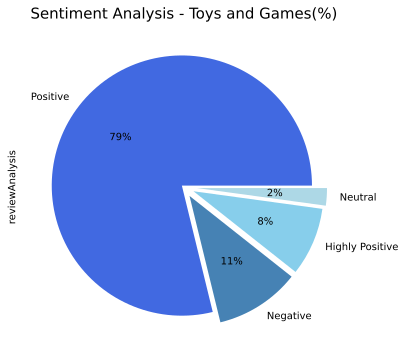

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS

plt.figure(figsize=(10,6))
toys_review_df["reviewAnalysis"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Toys and Games(%)", fontsize=15)
plt.show()

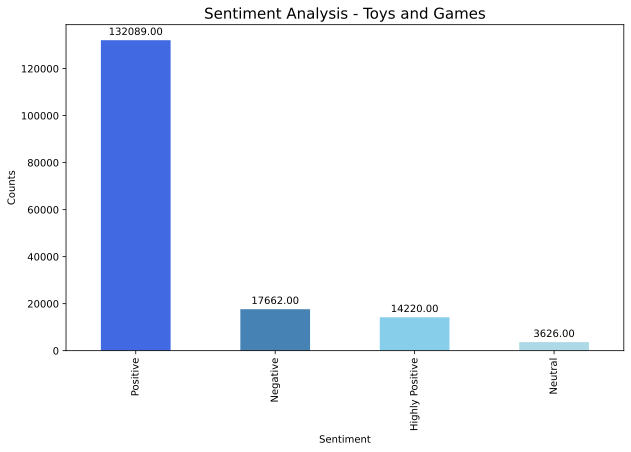

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS
plt.bar
plt.figure(figsize=(10,6))
ax = toys_review_df["reviewAnalysis"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

plt.title("Sentiment Analysis - Toys and Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

In [ ]:
#ACCURACY CHECK 

toys_review_df_sample = toys_review_df.sample(n=10, random_state=21)   #taking samples from the model to visually check the accuracy

for i in range(0,10):
    print("Review : ",toys_review_df_sample["reviewText"].iloc[i])
    print("Sentiment : ",toys_review_df_sample["reviewAnalysis"].iloc[i] )
    print("-----------")

Review :  im actually considering buying second set super cool looking crafted sturdy bookend thick manuals lol started cookbooks realized folly video games rectified situation lol youre looking played portal 2 know somebody wont disappointed sense regards bookends cake lie
Sentiment :  Positive
-----------
Review :  grandsons wanted christmas bought 2 play lot use friends play dates
Sentiment :  Neutral
-----------
Review :  little leapfrog tablet provided hours fun year old loves cameravideo feature constant use vacation unit easy manipulate technically physically complaint concern sturdiness lets isnt exactly kid proof asking waterproof scratch-proof unrealistic design makes suitable sitting playing indoors rough-and-tumble life year old boy overall fun looking exploring downloadable options soon
Sentiment :  Positive
-----------
Review :  vacation kids got hooked questions found got card game home play family fun play family
Sentiment :  Negative
-----------
Review :  kind toy id w

### INTERPRETATION : From above analyse, it gives the accuracy of 90% for review text sentiment analysis. 

**TASK 1.3 - Find the reason of negative reviews for product highest number of negative reviews**

In [ ]:
toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative")]["asin"].mode()

0    B004S8F7QM
dtype: object

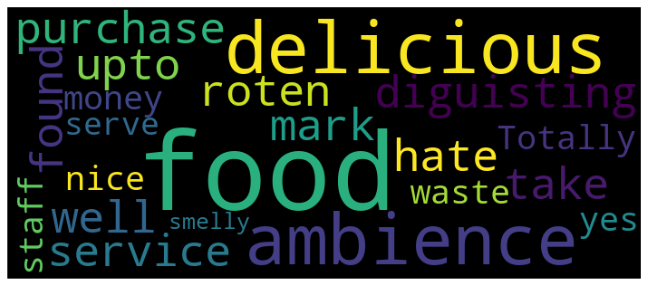

In [ ]:
#example of use of TextBlob

negative_df=toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative") & (toys_review_df["asin"]=="B004S8F7QM")]
op=["The food Was delicious but ambience was diguisting.", "The food we take has been roten, I hate the service as well.", "I had purchase it but found it is not upto the mark.Totally waste of money.","The staff was nice to me but yes the food they serve is smelly."]
from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join(op)
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

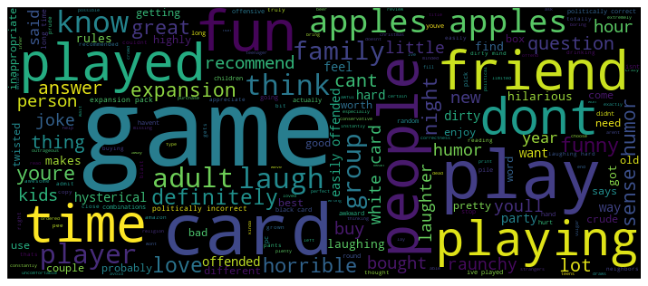

In [ ]:
negative_df=toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative") & (toys_review_df["asin"]=="B004S8F7QM")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [ ]:
#USING PYABSA LIBRARY FOR REASON ANALYSIS
#it works only in google collab 

from pyabsa import available_checkpoints
# ATEPC >> Aspect Term Extraction Polarity Classification
from pyabsa import ATEPCCheckpointManager
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',auto_device=True)

This script could only be used to manage NVIDIA GPUs,but no GPU found in your device
Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT
config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.config
state_dict: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.state_dict
model: None
tokenizer: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.tokenizer


Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have b

Config used in Training:
ABSADatasetsVersion:None	-->	Calling Count:0
IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:1
MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x7fea01817e10>	-->	Calling Count:0
PyABSAVersion:1.15.7	-->	Calling Count:0
SRD:3	-->	Calling Count:79070
TorchVersion:1.10.0+cuda11.3	-->	Calling Count:0
TransformersVersion:4.20.1	-->	Calling Count:0
auto_device:True	-->	Calling Count:50569
batch_size:16	-->	Calling Count:5
cache_dataset:True	-->	Calling Count:1
dataset_file:{'train': ['integrated_datasets/atepc_datasets/110.SemEval/113.laptop14/Laptops_Train.xml.seg.atepc', 'integrated_datasets/atepc_datasets/110.SemEval/114.restaurant14/Restaurants_Train.xml.seg.atepc', 'integrated_datasets/atepc_datasets/110.SemEval/116.restaurant16/restaurant_train.raw.atepc', 'integrated_datasets/atepc_datasets/101.ACL_Twitter/acl-14-short-data/train.raw.atepc', 'integrated_datasets/atepc_datasets/109.MAMS/train.xml

In [ ]:
#example of results we get with the use of pyabsa library

reasons=[]
for i in op:
  reasons.append(aspect_extractor.extract_aspect(inference_source=[i], pred_sentiment=True))

/usr/local/lib/python3.7/dist-packages/transformers/models/deberta_v2/modeling_deberta_v2.py:542: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bucket_pos = np.where(abs_pos <= mid, relative_pos, log_pos * sign).astype(np.int)
/usr/local/lib/python3.7/dist-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:360: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/

The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: The <food:Positive Confidence:0.9995703101158142> Was delicious but <ambience:Negative Confidence:0.999468982219696> was diguisting .
The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: The <food:Negative Confidence:0.9994763731956482> we take has been roten , I hate the <service:Negative Confidence:0.9998297691345215> as well .
The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: I had purchase it but found it is not upto the mark . Totally waste of <money:Negative Confidence:0.9997450709342957> .
The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: The <staff:Positive Confidence:0.9996293783187866> was nice to me but yes the <food:Negative Confidence:0.9935842156410217> they serve is smelly .


In [ ]:
reasons=[]
for i in negative_df['Reviews_orignal']:
  reasons.append(aspect_extractor.extract_aspect(inference_source=[i], pred_sentiment=True))


The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: As my 28 y / o daughter said throughout her first time playing this game . . . . & # 34 ; this is so not okay & # 34 ; and & # 34 ; I ' m going straight to hell & # 34 ; Definitely not a game for children or young teens or super religious people . But as has become our tradition to take a shot of Fire Ball Whiskey before we play the game . You know you ' ve ventured into some things you have been thinking and some that you haven ' t ever thought of before ! A great tension buster , a bonding game to say the least . We were introduced to this game during a family wedding weekend and although my 17 year old told me about the game a few days prior it ' s not a game you expect . Everyone asks & # 34 ; have you played Apples to Apples before & # 34 ; , ( for me NO ) , it ' s off the chart hysterical , vulgar and creative . Think MadLibs times infinity and so politically incorrect ! ! We 

In [ ]:
print("The reasons for negative reviews of the most popular negative product of Toys and Games category are : Card Quality, Poor Replay, Adult theme.")

The reasons for negative reviews of the most popular negative product of Toys and Games category are : Card Quality, Poor Replay, Adult theme.


**EXTRACTING PRODUCT NAMES FROM TEXT IN DATASET (TOYS AND GAMES)**

In [ ]:
prd_id=[]
product_name=[]
c=1
for j in toys_review_df.asin.unique()[:50]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=toys_review_df[toys_review_df['asin']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PERSON':
              count.append(w.text)
            if w.label_=="ORG":
              count.append(w.text)
          
    if count==[]:
      product_name.append("games.NA")
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 ASIN code and their respective product names : ")
print()  
toys_product_names=pd.DataFrame()
toys_product_names["ASIN Code"]=prd_id
toys_product_names["Product Name"]= product_name
toys_product_names.head(20)

Here are the list of first 20 ASIN code and their respective product names : 



,ASIN Code,Product Name
0,0439893577,Magnetic
1,048645195X,Marty Noble
2,0545496470,games.NA
3,0615444172,games.NA
4,0670010936,Llama Llama
5,0735308365,ABC
6,0735321396,WONDERFUL!He
7,073533305X,Mudpuppy
8,0735333483,Melissa
9,073533417X,Mudpuppy


## Dataset - Video games

In [ ]:
#CHECK DATA IN PANDAS 
datacheck(vgames_review_df)

Total dataset: (232483, 9)

Number of reviews:  232483

Number of unique reviewers:  24303
Prop of unique reviewers:  0.105

Number of unique products:  10672
Prop of unique products:  0.046

Average rating score:  4.086



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4,DIRT 3,1308009600,"06 14, 2011"


In [ ]:
#CHECK FOR NULL VALUES AND DROPPING UNWANTED COLUMNS
null(vgames_review_df)

reviewerID           0
asin                 0
reviewerName      2814
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64


In [ ]:
vgames_review_df["reviewText"] = clean_text(vgames_review_df["reviewText"])

print("The final dataset of Video Games are after data preprocessing : ")
print()
vgames_review_df.head()

#to save file into csv
#df1.to_csv('/Users/emineakbulut/Desktop/capstone project 2/data/cleaned_review_health_and_personal_care.csv', sep = ',', encoding = 'utf-8', index = False)


The final dataset of Video Games are after data preprocessing : 



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary
0,A2HD75EMZR8QLN,0700099867,installing game struggle games windows live bu...,1,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...
1,A3UR8NLLY1ZHCX,0700099867,like rally cars game funit oriented 34european...,4,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...
2,A1INA0F5CWW3J4,0700099867,1st shipment received book instead game2nd shi...,1,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...
3,A1DLMTOTHQ4AST,0700099867,got version instead ps3 version turned mistake...,3,2011-09-14,"I got this version instead of the PS3 version,...","I got this version instead of the PS3 version,..."
4,A361M14PU2GUEG,0700099867,dirt 2 xbox 360 okay game started playing game...,4,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...


In [ ]:
#APPLYING POLARITY SCORES WITH RESPECT TO REVIEWS 
vgames_review_df["reviewPolarity"] = vgames_review_df["reviewText"].apply(getpolarity)

#CATEGORISING SENTIMENTS ACCORDING TO POLARITY SCORES
vgames_review_df["reviewAnalysis"] =vgames_review_df["reviewPolarity"].apply(getanalysis)
vgames_review_df

,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A2HD75EMZR8QLN,0700099867,installing game struggle games windows live bu...,1,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,A3UR8NLLY1ZHCX,0700099867,like rally cars game funit oriented 34european...,4,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive
2,A1INA0F5CWW3J4,0700099867,1st shipment received book instead game2nd shi...,1,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...,-0.200000,Negative
3,A1DLMTOTHQ4AST,0700099867,got version instead ps3 version turned mistake...,3,2011-09-14,"I got this version instead of the PS3 version,...","I got this version instead of the PS3 version,...",-0.021147,Negative
4,A361M14PU2GUEG,0700099867,dirt 2 xbox 360 okay game started playing game...,4,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...,0.233766,Positive
...,...,...,...,...,...,...,...,...,...
232478,A1ICREREXO9J81,B00KHECZXO,funny people rating sellers ripping supposedly...,5,2014-07-20,Funny people on here are rating sellers that a...,Funny people on here are rating sellers that a...,0.408333,Positive
232479,A3VVMIMMTYQV5F,B00KHECZXO,deluxe 32gb wii u mario kart 8 separately 350t...,1,2014-06-21,All this is is the Deluxe 32GB Wii U with Mari...,All this is is the Deluxe 32GB Wii U with Mari...,0.031429,Positive
232480,A1DD4B97M4DUC5,B00KHECZXO,package red steering wheel retail value 330 42...,1,2014-05-29,The package should have more red on it and sho...,The package should have more red on it and sho...,0.025000,Positive
232481,A2Q9CNJ4T6ZK99,B00KHECZXO,newegg 32900 packaging alittle arrived box red,1,2014-06-02,Can get this at Newegg for $329.00 and the pac...,Can get this at Newegg for $329.00 and the pac...,0.000000,Neutral


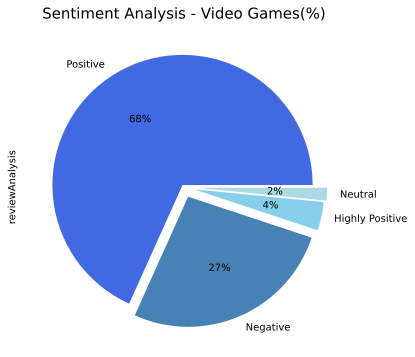

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS

plt.figure(figsize=(10,6))
vgames_review_df["reviewAnalysis"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Video Games(%)", fontsize=15)
plt.show()

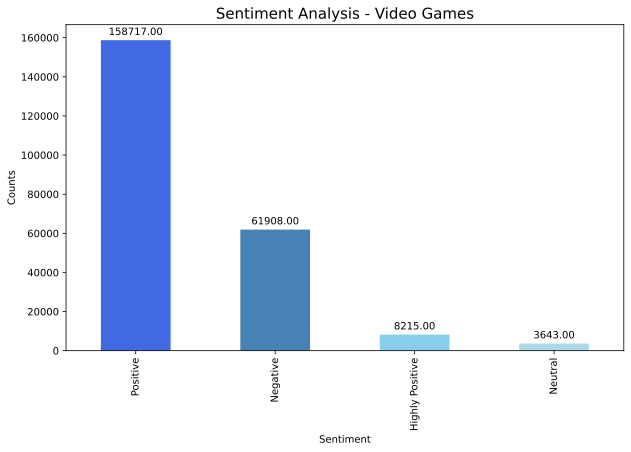

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS
plt.bar
plt.figure(figsize=(10,6))
ax = vgames_review_df["reviewAnalysis"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

plt.title("Sentiment Analysis - Video Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

In [ ]:
#ACCURACY CHECK 

vgames_review_df_sample = vgames_review_df.sample(n=10, random_state=21)   #taking samples from the model to visually check the accuracy

for i in range(0,10):
    print("Review : ",vgames_review_df_sample["reviewText"].iloc[i])
    print("Sentiment : ",vgames_review_df_sample["reviewAnalysis"].iloc[i] )
    print("-----------")

Review :  played metro 2033 loved metro light comes im excited pick left offnow im quarter way light games play cant buy game release date coming saturday im ready beat daynope im train beginning im walking check items im hopping messing buttons find outside train movingi went window stops time im stuck im able walk forth train cant restart turn game come day laterjust glitch biggiedoes bother kind stuff happens im playing like close combat shotty im blasting guys left right find shotgun strong knocks wall standing near brick steel shotgun disappear wall half leg sticking shaking crap gamethe game fun eerie moments thing noticed place place npc characters addressing fine barely met told namenow know know isolated areas biggie noticed graphics pretty good great overall im satisfied game waited price drop right id game 810 edit 525 ive playing hour day review able finish slight frustration lets start bit repetitive games like going place place etc thats reason frustration time time die g

### INTERPRETATION : From above analyse, it gives the accuracy of 90% for review text sentiment analysis. 

**TASK 1.3 - Find the reason of negative reviews for product highest number of negative reviews**

In [ ]:
vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Negative")]["asin"].mode()

0    B00178630A
dtype: object

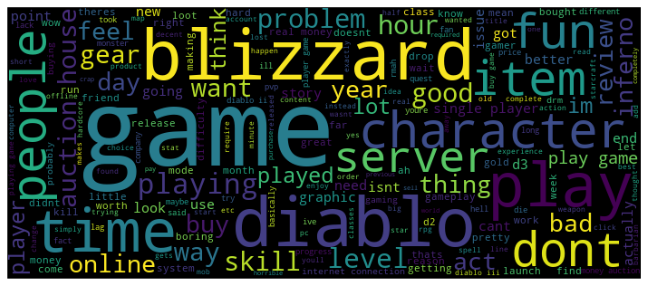

In [ ]:
negative_df=vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Negative") & (vgames_review_df["asin"]=="B00178630A")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [ ]:
#ALSO EXTRACTING THE REASONS WITH ASPECT EXTRACTOR METHOD

reasons=[]
for i in negative_df['Reviews_orignal']:
  reasons.append(aspect_extractor.extract_aspect(inference_source=[i], pred_sentiment=True))

The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: No problem so far . I like it . I loved D1 and D2 , and I am going to love this <game:Positive Confidence:0.9986581802368164> , too . I already do . There is nothing more fun in a game than to kill wave after wave of zombies , skeletons , exploding mods who have little imps growing them . I ' m sorry for you guys who are so angry .


KeyboardInterrupt: ignored

In [ ]:
print("The reasons for negative reviews of the most popular negative product are : Server and Installing.")

The reasons for negative reviews of the most popular negative product are : Server and Installing.


**PRODUCT NAME RECOMMENDATION**

In [ ]:
#USING NER MEHTOD TO FETCHED OUT THE PRODUCT NAME 

prd_id=[]
product_name=[]
c=1
for j in vgames_review_df.asin.unique()[:50]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=vgames_review_df[vgames_review_df['asin']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PERSON':
              count.append(w.text)
            if w.label_=="ORG":
              count.append(w.text)
          
    if count==[]:
      product_name.append("games.NA")
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 ASIN code and their respective product names : ")  
vgames_product_names=pd.DataFrame()
vgames_product_names["ASIN Code"]=prd_id
vgames_product_names["Product Name"]= product_name
vgames_product_names.head(20)

Here are the list of first 20 ASIN code and their respective product names : 


,ASIN Code,Product Name
0,0700099867,Codemasters
1,6050036071,appearance!Really
2,7100027950,Nintendo
3,7293000936,Wii
4,8176503290,Hawx
5,907843905X,the Creator's Forum
6,9625990674,Black Silicone
7,9861019731,Gamecube
8,9882155456,Gamecube
9,B000003SQQ,Frosty


**RELATION/BUYING TRENDS BETWEEN COMMON CUSTOMERS**

In [ ]:
#FINDING THE LIST OF COMMON CUSTOMERS IN BOTH CATEGORIES

common= (vgames_review_df.merge(toys_review_df, how="inner", on="reviewerID"))["reviewerID"].unique()
common

array(['ANW6EGY12V5XS', 'A4PPZNQF1X2IY', 'A1IZGZFO1W4UX0', ...,
       'A3DEMJM66762AA', 'AOIF9ILHW5TAG', 'A1QYTCXVMPWA2E'], dtype=object)

In [ ]:
#COMMON CUSTOMER COUNT 

vgames_common_df=(vgames[vgames["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Total Number of custumers(Reviewer ID) : ", len(vgames.reviewerID.unique())+len(toys.reviewerID.unique()))
print("Total number of common csutomer that reviwed both categories : ", len(vgames_common_df))
print("Percentage of common customer : ", (len(vgames_common_df))/(len(vgames.reviewerID.unique())+len(toys.reviewerID.unique()))*100)
vgames_common_df[["reviewerID","reviewerName"]]

Total Number of custumers(Reviewer ID) :  43715
Total number of common csutomer that reviwed both categories :  21406
Percentage of common customer :  48.96717373899119


,reviewerID,reviewerName
11,ANW6EGY12V5XS,Henri Savin
33,A4PPZNQF1X2IY,"EugeSchu ""be-bop"""
43,A1IZGZFO1W4UX0,Mike Wahl
48,A19GTQ0YMXO8VW,Shane - AFR
83,A2RLQKE9NHSSZB,Ghost
...,...,...
232445,A1UQBFCERIP7VJ,Margaret Picky
232446,A2XX2A4OJCDNLZ,RatherLiveInKeyWest
232448,A96K1ZGW56S2I,"tvtv3 ""tvtv3"""
232453,A1ZR8AIM298DFT,"Edward Nigma ""TheEnigma313"""


In [ ]:
#EXTRACTING THE DATA OF COMMON CUSTOMERS FROM BOTH CATEGORY

vgames_common_df=(vgames_review_df[vgames_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
#top_common= [Counter(vgames_common_df["reviewerID"]).most_common(5)[0][0]]
#plt.plot(Counter(vgames_common_df["reviewerID"]).most_common(5))
#io=pd.DataFrame(top_common)
print("Top customer of common data in Video Games : ",Counter(vgames_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Video Games : ",Counter(vgames_common_df["asin"]).most_common(5))
vgames_common_df=vgames_common_df.set_index((vgames_common_df["reviewTime"]))
vgames_common_df =vgames_common_df['reviewerID'].resample('Y').count()
print()
print("*"*20)


toys_common_df=(toys_review_df[toys_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Top customer of common data in Toys and Games : ",Counter(toys_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Toys and Games : ",Counter(toys_common_df["asin"]).most_common(5))
toys_common_df=toys_common_df.set_index((toys_common_df["reviewTime"]))
toys_common_df=toys_common_df['reviewerID'].resample('Y').count()

Top customer of common data in Video Games :  [('A3W4D8XOGLWUN5', 457), ('AFV2584U13XP3', 320), ('A2TCG2HV1VJP6V', 272), ('A20DZX38KRBIT8', 270), ('A2582KMXLK2P06', 220)]
Top Product of common data in Video Games :  [('B0009VXBAQ', 76), ('B004VQENY8', 61), ('B00BGA9WK2', 59), ('B0088MVPRY', 58), ('B0015AARJI', 50)]

********************
Top customer of common data in Toys and Games :  [('A2RVCF21L2NPU5', 117), ('A1EVV74UQYVKRY', 116), ('A30H2335OM7RD6', 116), ('A215WH6RUDUCMP', 114), ('A22CW0ZHY3NJH8', 105)]
Top Product of common data in Toys and Games :  [('B0015KVAEE', 64), ('B002DHC6FA', 39), ('B0089RPUHO', 38), ('B003AIM52A', 37), ('B004S8F7QM', 35)]


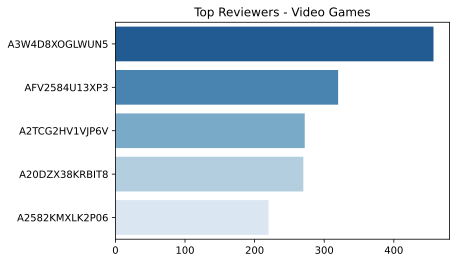

In [ ]:
top_customer_video =["A3W4D8XOGLWUN5", 'AFV2584U13XP3','A2TCG2HV1VJP6V', 'A20DZX38KRBIT8','A2582KMXLK2P06']
customer_counts_video=[457,320, 272, 270, 220]
sns.barplot(y = top_customer_video, x = customer_counts_video, palette="Blues_r", orient="h"  )
plt.title("Top Reviewers - Video Games")
plt.show()




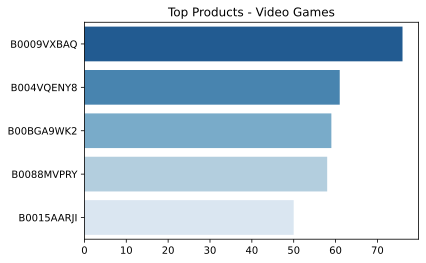

In [ ]:
top_product_video = ['B0009VXBAQ','B004VQENY8', 'B00BGA9WK2','B0088MVPRY', 'B0015AARJI']
product_count_video = [ 76, 61, 59, 58, 50]
sns.barplot(y = top_product_video, x = product_count_video, palette="Blues_r", orient="h"  )
plt.title("Top Products - Video Games")
plt.show()

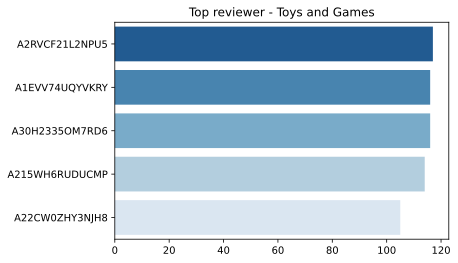

In [ ]:
#plt.bar( x=top_customer_video, height=customer_counts_video)
top_customer_toys =['A2RVCF21L2NPU5', 'A1EVV74UQYVKRY', 'A30H2335OM7RD6', 'A215WH6RUDUCMP', 'A22CW0ZHY3NJH8']
customer_counts_toys=[117, 116 , 116, 114, 105]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h"  )
plt.title("Top reviewer - Toys and Games")
plt.show()


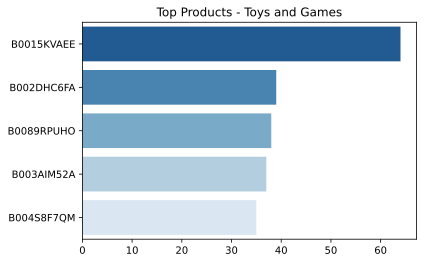

In [ ]:
top_product_toys = ['B0015KVAEE', 'B002DHC6FA', 'B0089RPUHO', 'B003AIM52A', 'B004S8F7QM']
product_count_video = [64, 39, 38, 37, 35]
sns.barplot(y = top_product_toys, x = product_count_video, palette="Blues_r", orient="h" ,  )
plt.title("Top Products - Toys and Games")
plt.show()

In [ ]:
#EXTRACTING THE DATA OF COMMON CUSTOMERS FROM BOTH CATEGORY

vgames_common_df=(vgames_review_df[vgames_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Top customer of common data in Video Games : ",Counter(vgames_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Video Games : ",Counter(vgames_common_df["asin"]).most_common(5))
vgames_common_df=vgames_common_df.set_index((vgames_common_df["reviewTime"]))
vgames_common_df =vgames_common_df['reviewerID'].resample('Y').count()
print()
print("*"*20)


toys_common_df=(toys_review_df[toys_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Top customer of common data in Toys and Games : ",Counter(toys_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Toys and Games : ",Counter(toys_common_df["asin"]).most_common(5))
toys_common_df=toys_common_df.set_index((toys_common_df["reviewTime"]))
toys_common_df=toys_common_df['reviewerID'].resample('Y').count()

Top customer of common data in Video Games :  [('A3W4D8XOGLWUN5', 457), ('AFV2584U13XP3', 320), ('A2TCG2HV1VJP6V', 272), ('A20DZX38KRBIT8', 270), ('A2582KMXLK2P06', 220)]
Top Product of common data in Video Games :  [('B0009VXBAQ', 76), ('B004VQENY8', 61), ('B00BGA9WK2', 59), ('B0088MVPRY', 58), ('B0015AARJI', 50)]

********************
Top customer of common data in Toys and Games :  [('A2RVCF21L2NPU5', 117), ('A1EVV74UQYVKRY', 116), ('A30H2335OM7RD6', 116), ('A215WH6RUDUCMP', 114), ('A22CW0ZHY3NJH8', 105)]
Top Product of common data in Toys and Games :  [('B0015KVAEE', 64), ('B002DHC6FA', 39), ('B0089RPUHO', 38), ('B003AIM52A', 37), ('B004S8F7QM', 35)]


In [ ]:
#EXTRACTING THE DATA OF UNCOMMON CUSTOMERS FROM BOTH CATEGORY

vgames_not_common_df=(vgames_review_df[~vgames_review_df["reviewerID"].str.contains('|'.join(common) ,na=False) ])
print("Top customer of uncommon data in Video Games : ",Counter(vgames_not_common_df["reviewerID"]).most_common(5))
print("Top Product of uncommon data in Video Games : ",Counter(vgames_not_common_df["asin"]).most_common(5))
vgames_not_common_df=vgames_not_common_df.set_index((vgames_not_common_df["reviewTime"]))
vgames_not_common_df =vgames_not_common_df['reviewerID'].resample('Y').count()
print()
print("*"*20)


toys_not_common_df=(toys_review_df[~toys_review_df["reviewerID"].str.contains('|'.join(common), case=True) ])
print("Top customer of uncommon data in Toys and Games : ",Counter(toys_not_common_df["reviewerID"]).most_common(5))
print("Top Product of uncommon data in Toys and Games : ",Counter(vgames_common_df["asin"]).most_common(5))
toys_not_common_df=toys_not_common_df.set_index((toys_not_common_df["reviewTime"]))
toys_not_common_df=toys_not_common_df['reviewerID'].resample('Y').count()

Top customer of uncommon data in Video Games :  [('A3V6Z4RCDGRC44', 777), ('AJKWF4W7QD4NS', 642), ('A2QHS1ZCIQOL7E', 452), ('A29BQ6B90Y1R5F', 411), ('A1AISPOIIHTHXX', 225)]


KeyError: ignored

In [ ]:
vgames_common_df
#print(vgames_common_df["reviewerId"].Counter(count).most_commmon(1))
"""figure, axs= plt.subplots(2,1,figsize=(15,8))

ax=axs[0].set_title("Top Products of Common customers")
#axs[0].set_xlabel("Time Period")
axs[0].set_ylabel("Count of Reviewer ID")
sns.lineplot(x=vgames_common_df.index, y = vgames_common_df, color="blue", ax=axs[0], label="Video Games")
sns.lineplot(x=toys_common_df.index, y = toys_common_df, color="red",ax=axs[0],  label="Toys & Games")

ax=axs[1].set_title("Review trends of Uncommon customers")
ax=axs[1].set_xlabel("Time Period")
ax=axs[1].set_ylabel("Count of Reviewer ID")
sns.lineplot(x=vgames_not_common_df.index, y = vgames_not_common_df, color="blue",ax=axs[1],  label="Video Games")
sns.lineplot(x=toys_not_common_df.index, y = toys_not_common_df, color="red",ax=axs[1],  label="Toys & Games")"""

'figure, axs= plt.subplots(2,1,figsize=(15,8))\n\nax=axs[0].set_title("Top Products of Common customers")\n#axs[0].set_xlabel("Time Period")\naxs[0].set_ylabel("Count of Reviewer ID")\nsns.lineplot(x=vgames_common_df.index, y = vgames_common_df, color="blue", ax=axs[0], label="Video Games")\nsns.lineplot(x=toys_common_df.index, y = toys_common_df, color="red",ax=axs[0],  label="Toys & Games")\n\nax=axs[1].set_title("Review trends of Uncommon customers")\nax=axs[1].set_xlabel("Time Period")\nax=axs[1].set_ylabel("Count of Reviewer ID")\nsns.lineplot(x=vgames_not_common_df.index, y = vgames_not_common_df, color="blue",ax=axs[1],  label="Video Games")\nsns.lineplot(x=toys_not_common_df.index, y = toys_not_common_df, color="red",ax=axs[1],  label="Toys & Games")'

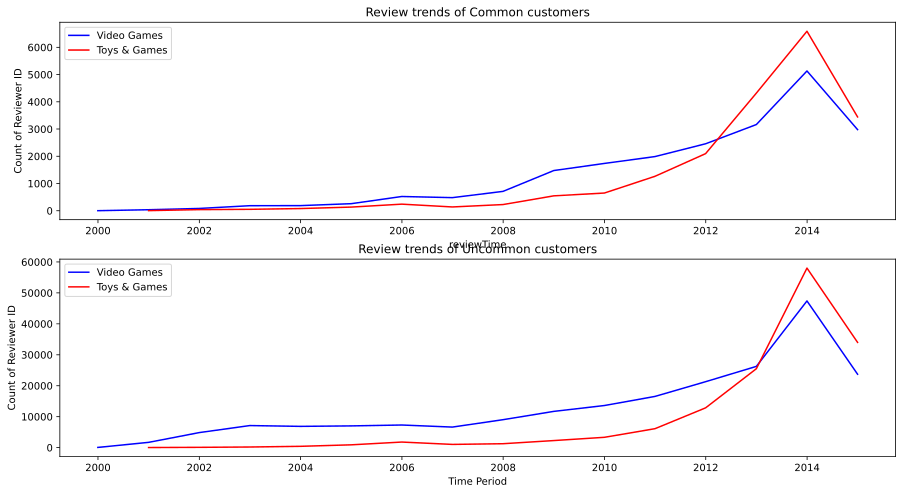

In [ ]:
figure, axs= plt.subplots(2,1,figsize=(15,8))

ax=axs[0].set_title("Review trends of Common customers")
#axs[0].set_xlabel("Time Period")
axs[0].set_ylabel("Count of Reviewer ID")
sns.lineplot(x=vgames_common_df.index, y = vgames_common_df, color="blue", ax=axs[0], label="Video Games")
sns.lineplot(x=toys_common_df.index, y = toys_common_df, color="red",ax=axs[0],  label="Toys & Games")

ax=axs[1].set_title("Review trends of Uncommon customers")
ax=axs[1].set_xlabel("Time Period")
ax=axs[1].set_ylabel("Count of Reviewer ID")
sns.lineplot(x=vgames_not_common_df.index, y = vgames_not_common_df, color="blue",ax=axs[1],  label="Video Games")
sns.lineplot(x=toys_not_common_df.index, y = toys_not_common_df, color="red",ax=axs[1],  label="Toys & Games")



plt.show()




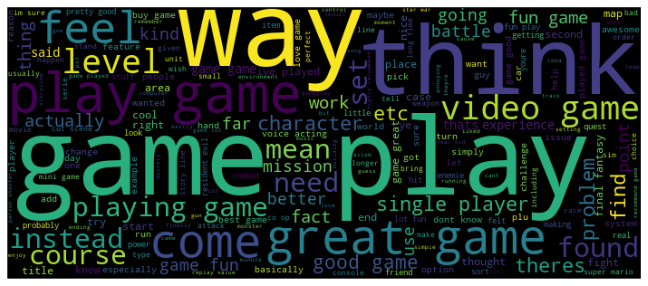

In [ ]:
negative_df=toys_review_df[(toys_review_df["reviewAnalysis"]=="Positive") & (toys_review_df["asin"]=="A3W4D8XOGLWUN5")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in vgames_review_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

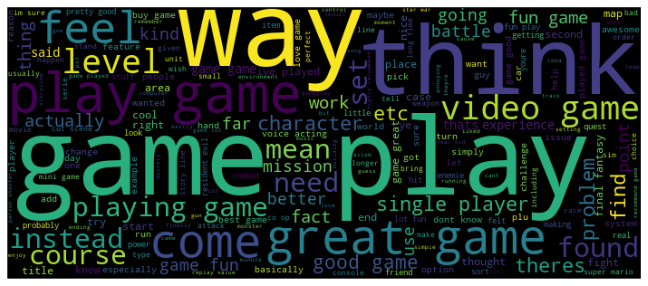

In [ ]:
negative_df=toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative") & (toys_review_df["asin"]=="BOOCKH9QRE")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in vgames_review_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [ ]:
negative_df=toys_review_df[(vgames_review_df["reviewAnalysis"]=="Negative") & (toys_review_df["asin"]=="B0009VXBAQ")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in vgames_review_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [ ]:
negative_df=toys_review_df[(vgames_review_df["reviewAnalysis"]=="Positive") & (toys_review_df["asin"]=="B0009VXBAQ")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in vgames_review_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

NameError: ignored

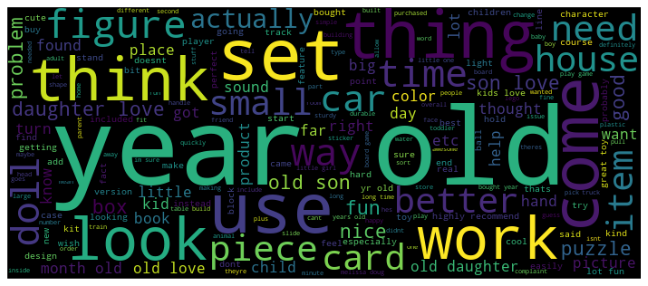

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in toys_review_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [ ]:
getpolarity("I love the delivery process  but product is worst.")

-0.25

In [ ]:
vgames_common_df

reviewTime
1999-12-31       2
2000-12-31      37
2001-12-31      84
2002-12-31     185
2003-12-31     188
2004-12-31     259
2005-12-31     523
2006-12-31     481
2007-12-31     711
2008-12-31    1476
2009-12-31    1737
2010-12-31    1989
2011-12-31    2459
2012-12-31    3165
2013-12-31    5132
2014-12-31    2978
Freq: A-DEC, Name: reviewerID, dtype: int64